In [107]:
#import pandas to read spreadsheet data
import pandas as pd
#import splitting function
from sklearn.model_selection import train_test_split
#import linear regression class
from sklearn.linear_model import LinearRegression
#import matplot to plot the predicted data compaired to true values
import matplotlib.pyplot as plt
#import r-squared value metric to check accuracy of predictions
from sklearn.metrics import r2_score
#import for preprocessing data
from sklearn import preprocessing
#import box plot
import seaborn as sns

In [108]:
#read file data and save to a variable
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
print(data)
data.describe()

        name  year  selling_price  km_driven    fuel seller_type transmission  \
0          1  2013        1550000      75800  Diesel      Dealer    Automatic   
1          1  2017        2750000      13000  Diesel  Individual    Automatic   
2          1  2012        2500000      48000  Diesel      Dealer    Automatic   
3          1  2017        2900000      40000  Diesel  Individual    Automatic   
4          1  2013        2000000     167223  Diesel      Dealer    Automatic   
...      ...   ...            ...        ...     ...         ...          ...   
4299  Datsun  2018         400000       4400  Petrol  Individual       Manual   
4300  Datsun  2018         300000      25000  Petrol  Individual    Automatic   
4301  Datsun  2015         310000      32686  Petrol      Dealer       Manual   
4302  Datsun  2017         350000      80000  Petrol  Individual       Manual   
4303  Datsun  2017         350000      10171  Petrol      Dealer       Manual   

      owner  Ave_cost  
0  

,year,selling_price,km_driven,owner,Ave_cost
count,4304.000000,4.304000e+03,4304.000000,4304.000000,4.304000e+03
mean,2013.096190,4.948433e+05,66155.746283,1.465613,4.948398e+05
std,4.206504,5.609870e+05,46647.352831,0.739464,3.887651e+05
min,1992.000000,2.000000e+04,1.000000,1.000000,2.367270e+05
25%,2011.000000,2.049990e+05,35000.000000,1.000000,3.424160e+05
50%,2014.000000,3.500000e+05,60000.000000,1.000000,4.199400e+05
75%,2016.000000,6.000000e+05,90000.000000,2.000000,5.381470e+05
max,2020.000000,8.900000e+06,806599.000000,5.000000,2.945385e+06


In [109]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
Ave_cost         0
dtype: int64

In [110]:
data.nunique()

name              17
year              27
selling_price    434
km_driven        765
fuel               5
seller_type        3
transmission       2
owner              5
Ave_cost          17
dtype: int64

In [111]:
#manipulate data and convert categoric features into numeric value
data['fuel'] = data['fuel'].astype('category')
data['fuel'] = data['fuel'].cat.codes
data['seller_type'] = data['seller_type'].astype('category')
data['seller_type'] = data['seller_type'].cat.codes
data['transmission'] = data['transmission'].astype('category')
data['transmission'] = data['transmission'].cat.codes
data['name'] = data['name'].astype('category')
data['name'] = data['name'].cat.codes
print (data)

      name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0        0  2013        1550000      75800     1            0             0   
1        0  2017        2750000      13000     1            1             0   
2        0  2012        2500000      48000     1            0             0   
3        0  2017        2900000      40000     1            1             0   
4        0  2013        2000000     167223     1            0             0   
...    ...   ...            ...        ...   ...          ...           ...   
4299    12  2018         400000       4400     4            1             1   
4300    12  2018         300000      25000     4            1             0   
4301    12  2015         310000      32686     4            0             1   
4302    12  2017         350000      80000     4            1             1   
4303    12  2017         350000      10171     4            0             1   

      owner  Ave_cost  
0         2   2945385  
1  

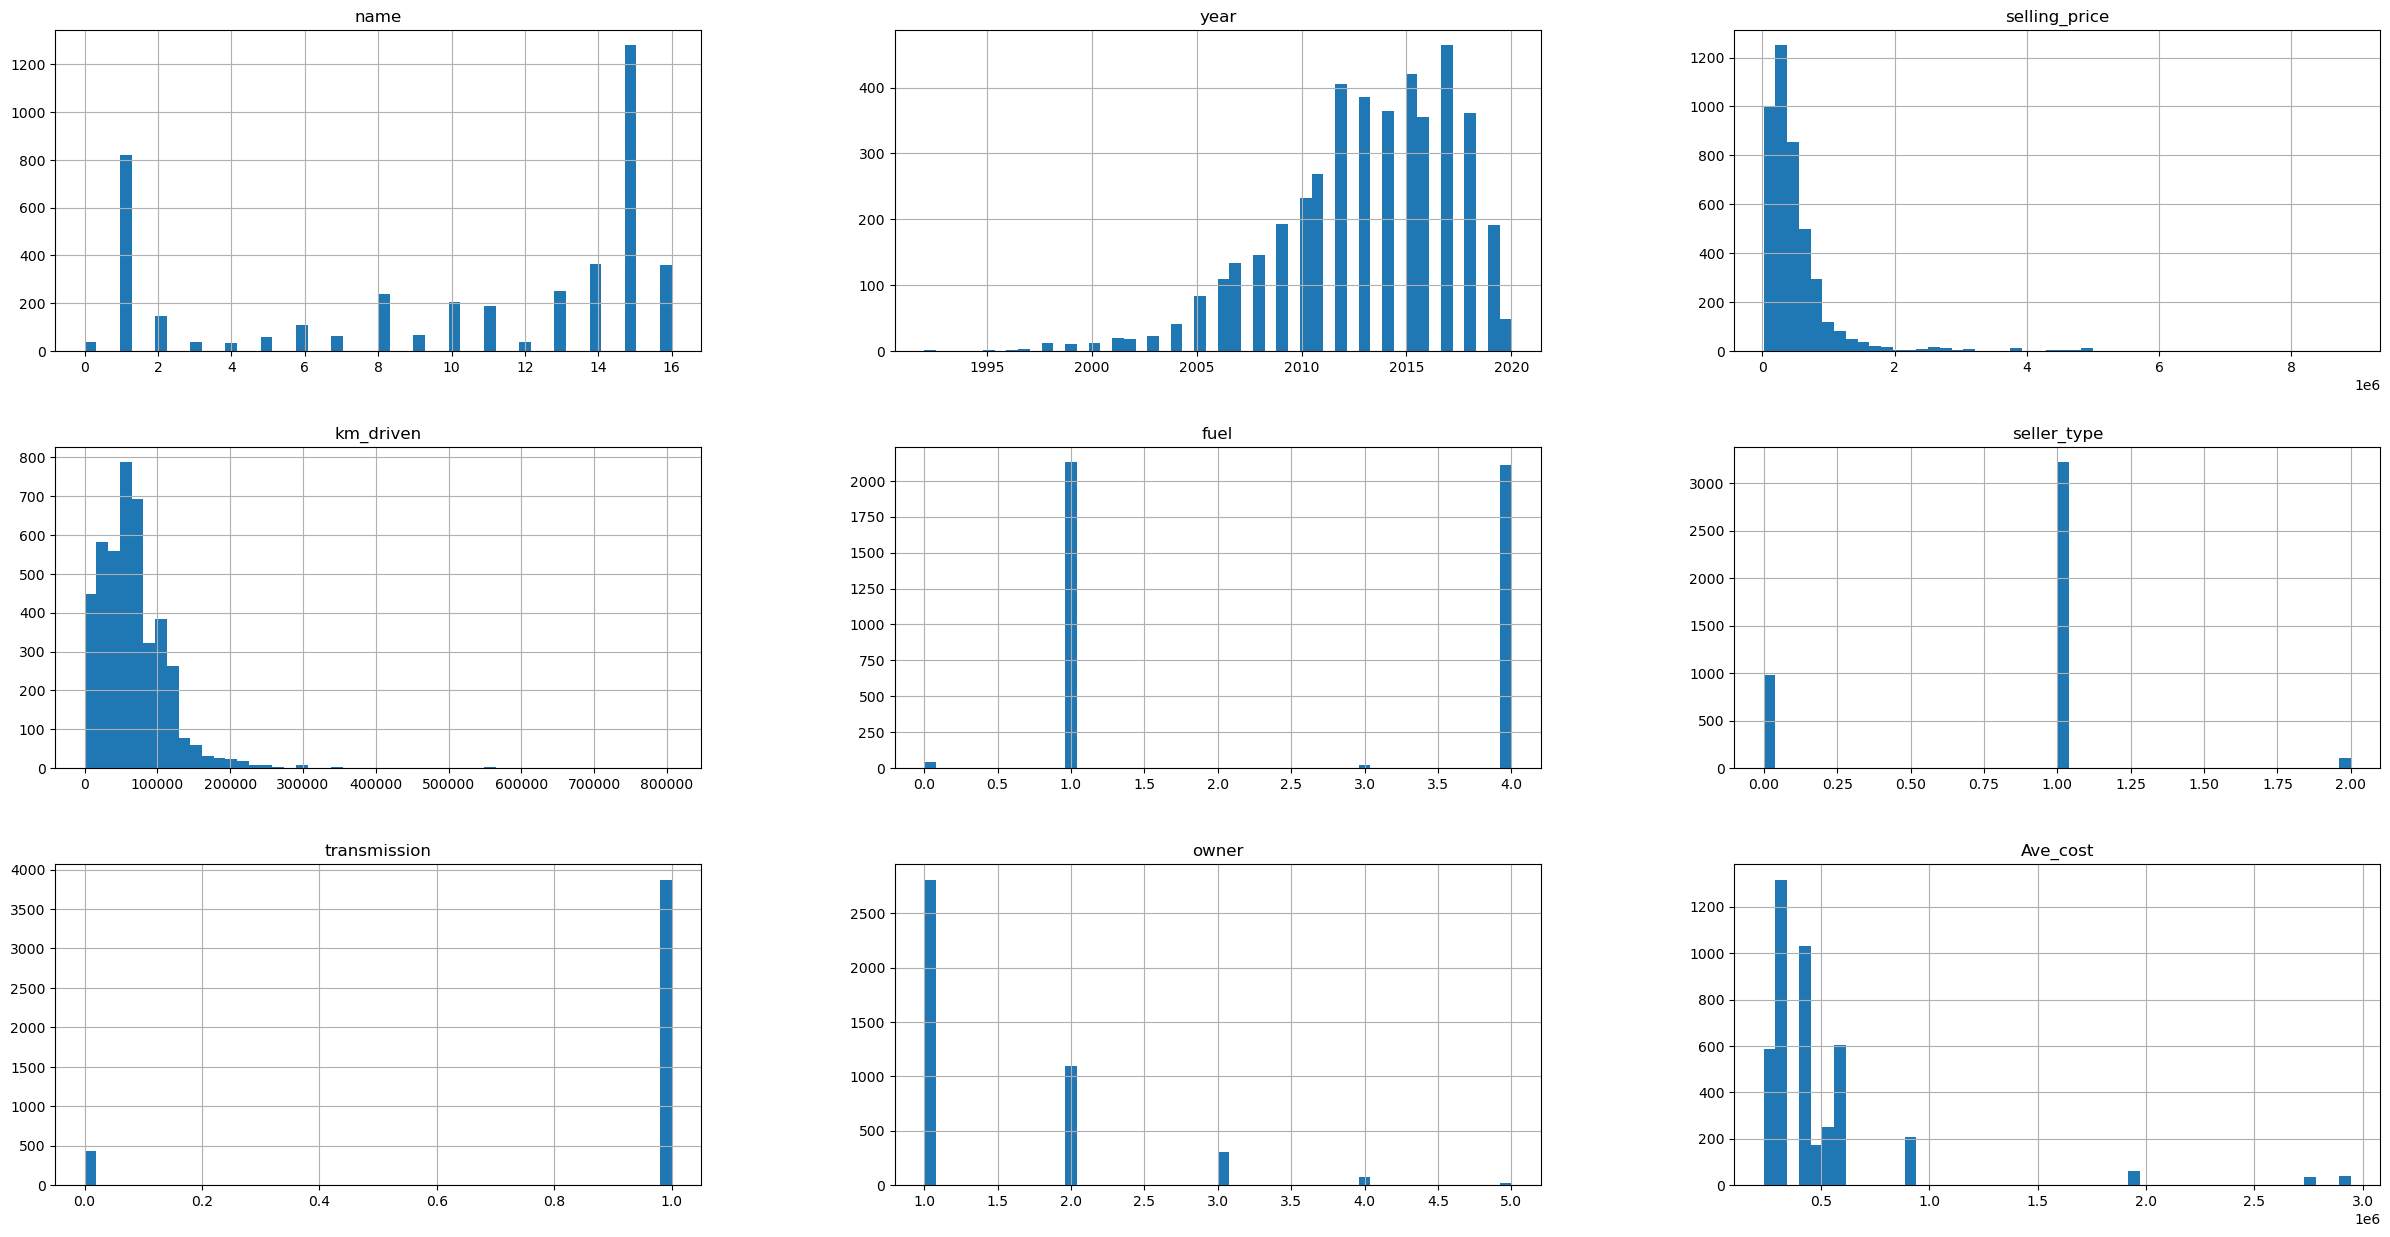

In [112]:
%matplotlib inline
data.hist(bins=50, figsize=(30,15))
plt.show()

In [113]:
data['Car_Age'] = 2021 - data['year']
print(data['Car_Age'])

0       8
1       4
2       9
3       4
4       8
       ..
4299    3
4300    3
4301    6
4302    4
4303    4
Name: Car_Age, Length: 4304, dtype: int64


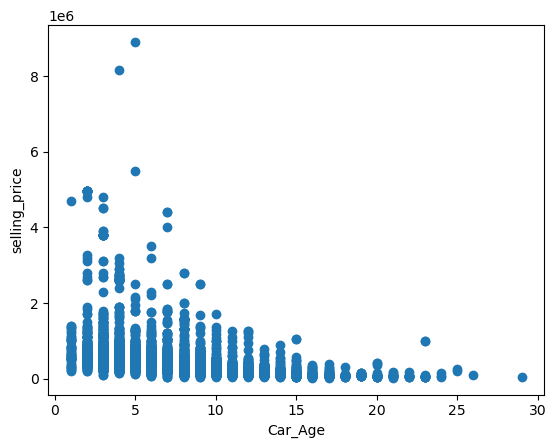

In [114]:
#Set X to be all independent variables/features x1 through xn
X = data["Car_Age"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("Car_Age")
plt.ylabel("selling_price")
plt.show()

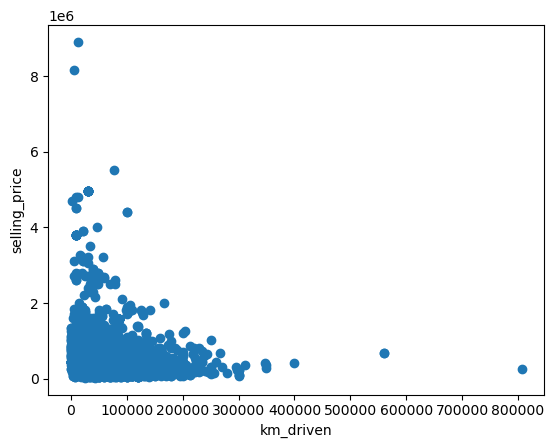

In [115]:
#Set X to be all independent variables/features x1 through xn
X = data["km_driven"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("km_driven")
plt.ylabel("selling_price")
plt.show()

<AxesSubplot:xlabel='Car_Age'>

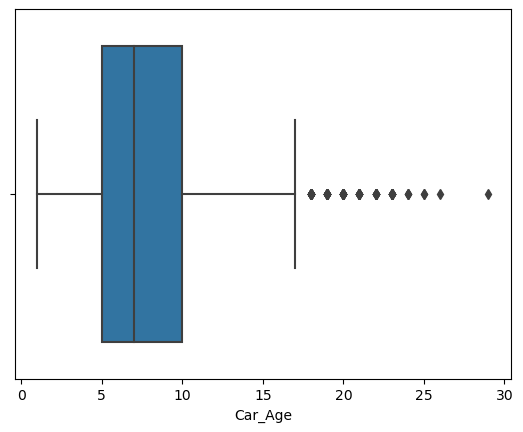

In [116]:
sns.boxplot(x=data['Car_Age'])

<AxesSubplot:xlabel='selling_price'>

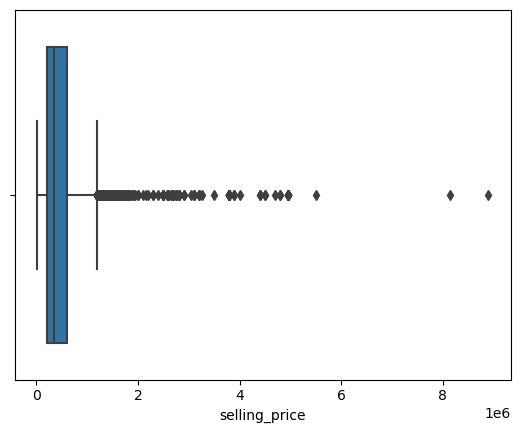

In [117]:
sns.boxplot(x=data['selling_price'])

<AxesSubplot:xlabel='km_driven'>

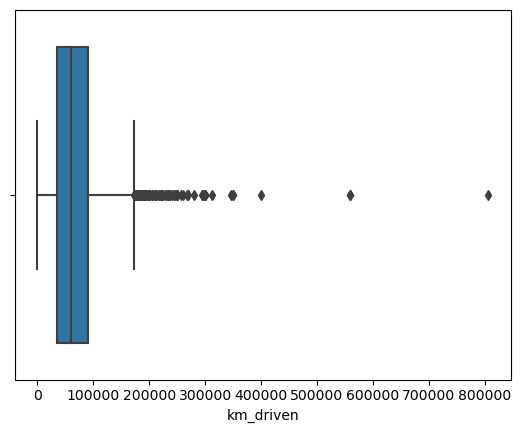

In [118]:
sns.boxplot(x=data['km_driven'])

<AxesSubplot:xlabel='owner'>

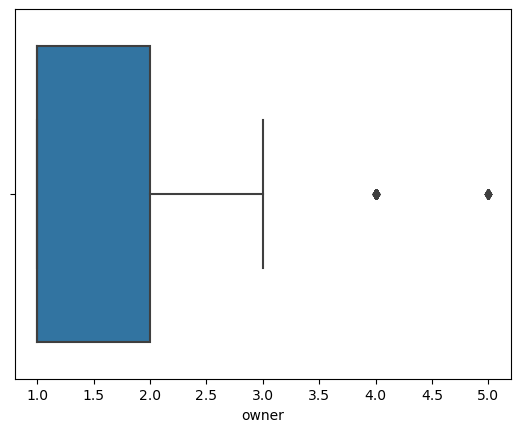

In [119]:
sns.boxplot(x=data['owner'])

<AxesSubplot:xlabel='Ave_cost'>

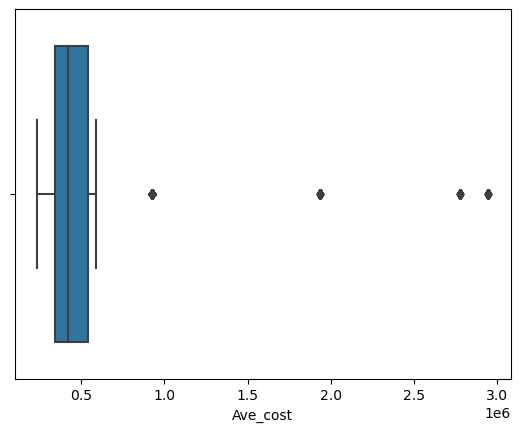

In [120]:
sns.boxplot(x=data['Ave_cost'])

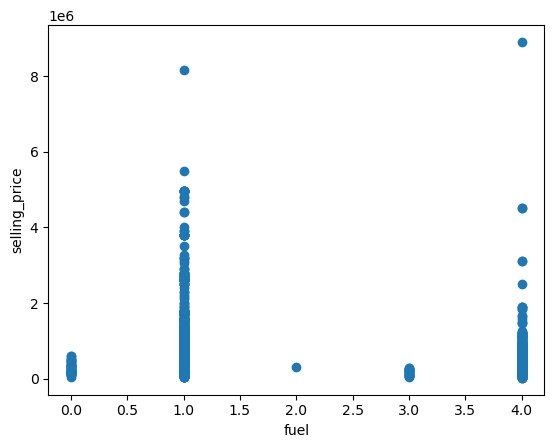

In [121]:
#Set X to be all independent variables/features x1 through xn
X = data["fuel"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("fuel")
plt.ylabel("selling_price")
plt.show()

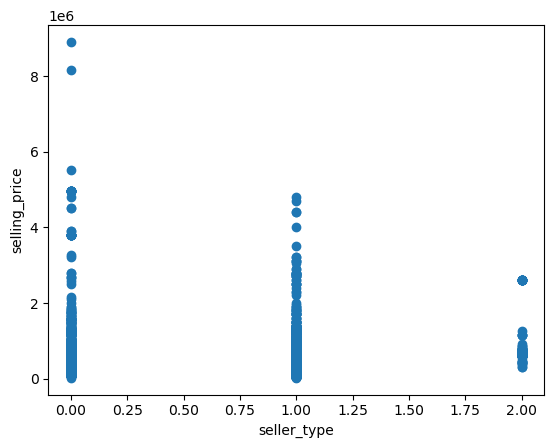

In [122]:
#Set X to be all independent variables/features x1 through xn
X = data["seller_type"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("seller_type")
plt.ylabel("selling_price")
plt.show()

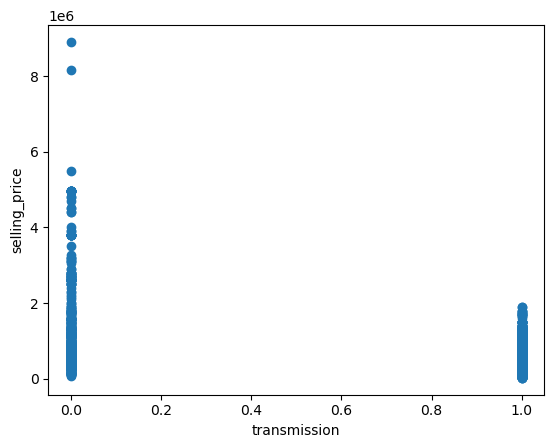

In [123]:
#Set X to be all independent variables/features x1 through xn
X = data["transmission"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("transmission")
plt.ylabel("selling_price")
plt.show()

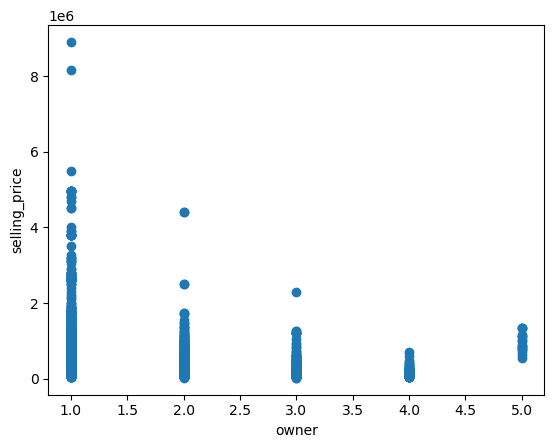

In [124]:
#Set X to be all independent variables/features x1 through xn
X = data["owner"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("owner")
plt.ylabel("selling_price")
plt.show()

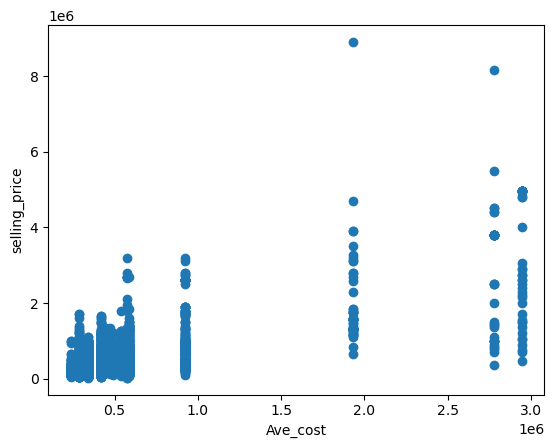

In [125]:
#Set X to be all independent variables/features x1 through xn
X = data["Ave_cost"]
Y = data["selling_price"]
#plot the predicted y-values against true y-values
plt.scatter(X, Y)
plt.xlabel("Ave_cost")
plt.ylabel("selling_price")
plt.show()

In [126]:
data.corr()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Ave_cost,Car_Age
name,1.000000,-0.093991,-0.181875,0.107025,-0.042018,0.148192,0.178428,0.059591,-0.262454,0.093991
year,-0.093991,1.000000,0.421184,-0.419649,-0.120086,-0.097223,-0.142881,-0.407686,0.065448,-1.000000
selling_price,-0.181875,0.421184,1.000000,-0.200648,-0.272094,-0.149491,-0.516182,-0.201714,0.692999,-0.421184
km_driven,0.107025,-0.419649,-0.200648,1.000000,-0.286718,0.113922,0.123824,0.274491,-0.000651,0.419649
fuel,-0.042018,-0.120086,-0.272094,-0.286718,1.000000,0.038571,0.036834,-0.002997,-0.213879,0.120086
seller_type,0.148192,-0.097223,-0.149491,0.113922,0.038571,1.000000,0.172121,0.140924,-0.182511,0.097223
transmission,0.178428,-0.142881,-0.516182,0.123824,0.036834,0.172121,1.000000,0.085104,-0.515759,0.142881
owner,0.059591,-0.407686,-0.201714,0.274491,-0.002997,0.140924,0.085104,1.000000,-0.047867,0.407686
Ave_cost,-0.262454,0.065448,0.692999,-0.000651,-0.213879,-0.182511,-0.515759,-0.047867,1.000000,-0.065448
Car_Age,0.093991,-1.000000,-0.421184,0.419649,0.120086,0.097223,0.142881,0.407686,-0.065448,1.000000


<AxesSubplot:>

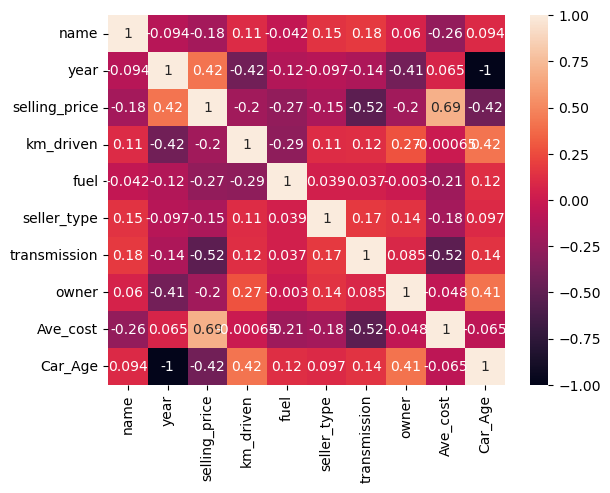

In [127]:
corelation=data.corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

In [128]:
#Set X to be all independent variables/features x1 through xn
X = data.drop(columns = "selling_price").drop(columns = "name").drop(columns = "seller_type").drop(columns = "owner")
Y = data["selling_price"]
print (X)
print (Y)

      year  km_driven  fuel  transmission  Ave_cost  Car_Age
0     2013      75800     1             0   2945385        8
1     2017      13000     1             0   2945385        4
2     2012      48000     1             0   2945385        9
3     2017      40000     1             0   2945385        4
4     2013     167223     1             0   2945385        8
...    ...        ...   ...           ...       ...      ...
4299  2018       4400     4             1    297027        3
4300  2018      25000     4             0    297027        3
4301  2015      32686     4             1    297027        6
4302  2017      80000     4             1    297027        4
4303  2017      10171     4             1    297027        4

[4304 rows x 6 columns]
0       1550000
1       2750000
2       2500000
3       2900000
4       2000000
         ...   
4299     400000
4300     300000
4301     310000
4302     350000
4303     350000
Name: selling_price, Length: 4304, dtype: int64


In [129]:
#split the data into a training set and testing set for associated X and Y values 20% saved for testing (random state is given to make split reproduceable)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [130]:
#create linear regression type object
lr = LinearRegression()
#fit it to the training set
lr.fit(X_train, Y_train)

LinearRegression()

In [131]:
#predict outputs of dependent variables for X dataset of feature values using developed linear regression function
Y_pred_train = lr.predict(X_train)
print(Y_pred_train)

[660707.35144593 370622.29173556  79461.85028528 ... 313459.05238284
 284989.44084712 258187.33370595]


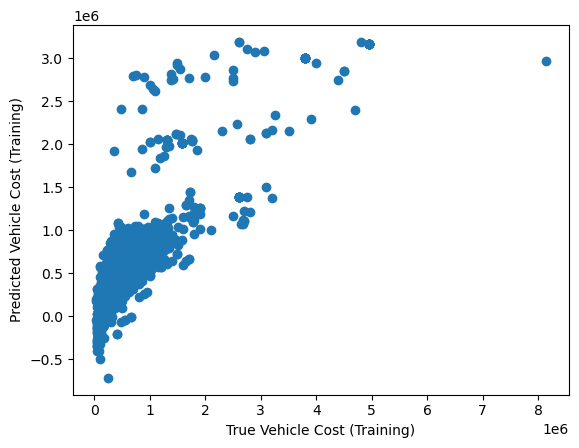

In [132]:
#plot the predicted y-values against true y-values
plt.scatter(Y_train, Y_pred_train)
plt.xlabel("True Vehicle Cost (Training)")
plt.ylabel("Predicted Vehicle Cost (Training)")
plt.show()

In [134]:
#check accuracy of predictions using r-squared value
r2_score(Y_train, Y_pred_train)

0.6857242946278683